In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import math 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

pd.options.display.max_columns = None

In [19]:
df = pd.read_csv("attacks_limpieza_7.csv", index_col = 0)
df.sample(3)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox
5464,0.950942,NaN,NaN,NaN,NaN,NaN
3093,0.982656,0.162791,0.162791,0.606383,0.345005,3.405135e-07
1693,0.993558,NaN,NaN,NaN,NaN,NaN


In [20]:
numericas = df.select_dtypes(include = np.number)
numericas.sample(2)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox
1249,0.995540,0.104651,0.104651,0.515592,0.259659,1.097148e-08
4112,0.971754,0.279070,0.279070,0.720766,0.480343,2.580282e-05


EJERCICIO 1: Estandarizar la columna de age usando todos los métodos aprendidos en la lección.

<font color = 'violet'> Manualmente

In [21]:
media = numericas["age_new"].mean()
desviacion = numericas["age_new"].std() 

In [22]:
numericas["age_estand_manual"] = (numericas["age_new"] - media) / desviacion

/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


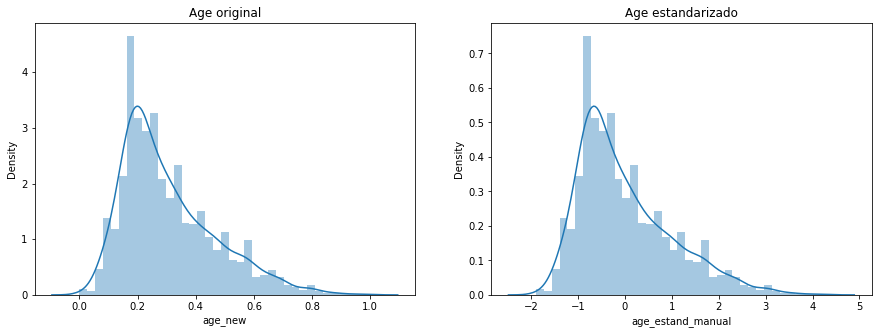

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas['age_estand_manual'], ax = axes[1]);

<font color = 'violet'>Sklearn StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(numericas)

StandardScaler()

In [26]:
X_escaladas = scaler.transform(numericas)

In [27]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(3)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox,age_estand_manual
0,-0.451575,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.462231,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.479991,NaN,NaN,NaN,NaN,NaN,NaN


/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


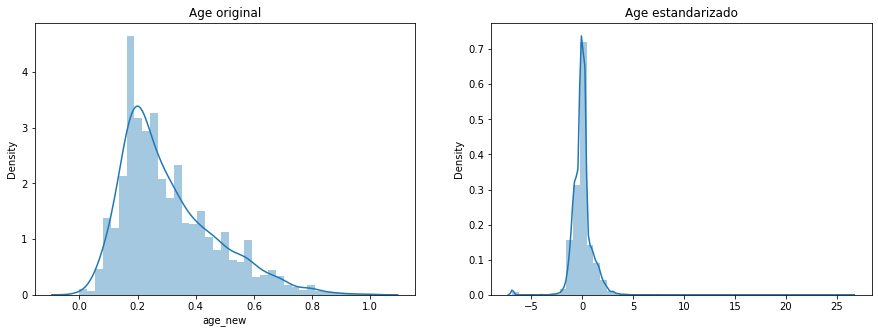

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas_estandar, ax = axes[1]);

<font color = 'violet'>Sklearn RobustScaler

In [29]:
robust = RobustScaler()

In [30]:
robust.fit(numericas)

RobustScaler()

In [31]:
X_robust = robust.transform(numericas)


In [32]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(15)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox,age_estand_manual
0,-2.793651,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.841270,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.920635,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.936508,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.984127,NaN,NaN,NaN,NaN,NaN,NaN
5,-3.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,-3.015873,NaN,NaN,NaN,NaN,NaN,NaN
7,-3.031746,NaN,NaN,NaN,NaN,NaN,NaN
8,-3.047619,NaN,NaN,NaN,NaN,NaN,NaN
9,-3.063492,NaN,NaN,NaN,NaN,NaN,NaN


/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


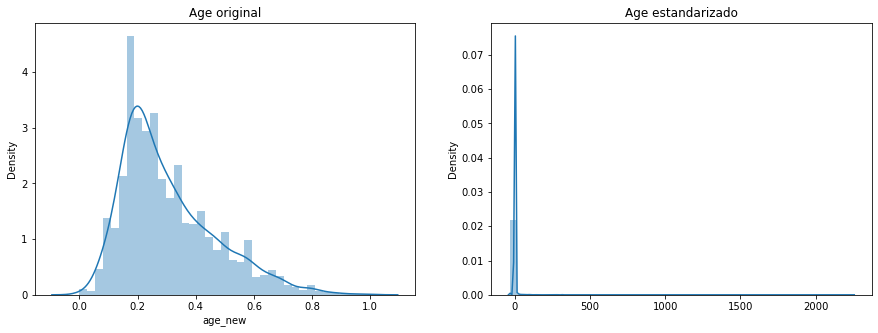

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas_robust, ax = axes[1]);

EJERCICIO 2: ¿Véis alguna diferencia entre cada uno de los métodos?

<font color = 'violet'>El StandarScaler se han acotado mucho más los datos entre el -5 y 5. En ambos la campana se ha estrechado.

EJERCICIO 3: Cread una gráfica con varios subplots donde en cada uno de ellos se vea el resultado de la estandarización y la normalización realizada en los dos ejercicios de pair programming de hoy.

/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


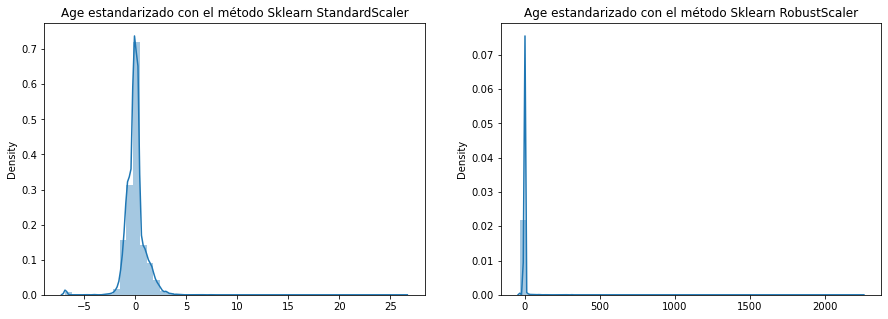

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age estandarizado con el método Sklearn StandardScaler')
axes[1].set_title('Age estandarizado con el método Sklearn RobustScaler')

sns.distplot(numericas_estandar ,ax = axes[0])
sns.distplot(numericas_robust, ax = axes[1]);